In [11]:
# Example 6-3: 손글씨 이미지 분류
## - Optimizer: SGD
## - Loss function: Cross entropy

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

import wget

In [12]:
##(6.4) Read MINST data
# Error: MNIST data is not available from 'mnist.org'
#(originial example)
#mnist = datasets.fetch_mldata('MNIST original', data_home='./data/')
#mnist
#(fixed) Reference: http://taewan.kim/post/sklearn_mnist_fetch_error/
URL = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
path = "/Users/seulgi/scikit_learn_data/openml/"
wget.download(URL, path)
#mnist = datasets.fetch_mldata('MNIST original')

#(final) python3 doesn't support fetch_mldata any longer
mnist = datasets.fetch_openml('mnist_784',version=1)

In [13]:
##(6.5) normalize data
mnist_data = mnist.data / 255
pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


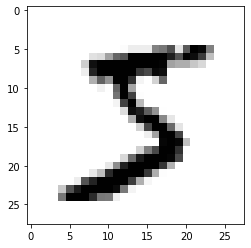

In [14]:
##(6.6) Plotting the first image
plt.imshow(mnist_data[0].reshape(28,28), cmap=cm.gray_r)
plt.show()

In [15]:
##(6.7) Label
mnist_label = mnist.target.astype(np.int8)
#mnist_label = mnist.target
mnist_label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [16]:
##(6.8) train/test data
train_size = 5000
test_size = 500

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(mnist_data, mnist_label, train_size=train_size, test_size=test_size)

In [17]:
##(6.9) data to tensor
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()
print(train_X.shape)
print(train_Y.shape)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, int64, int32, int16, int8, uint8, and bool.

In [ ]:
##(6.10) set minibatches
train = TensorDataset(train_X, train_Y)
print(train[0])
train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [ ]:
##(6.11) Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,256)
        self.fc3 = nn.Linear(256,256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,128)
        self.fc6 = nn.Linear(128,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x, dim=0)

model = Net()

In [ ]:
##(6.12) 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)
for epoch in range(1000):
    total_loss = 0
    for train_x, train_y in train_loader:
        #train_x, train_y = Variable(train_x), Variable(train_y)
        optimizer.zero_grad()
        output = model(train_x)
        loss = criterion(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.data.item()
    if (epoch+1)%100 == 0:
        print(epoch+1, total_loss)


In [ ]:
##(6.13)
result = torch.max(model(test_X).data, 1)[1]
accuracy = sum(test_Y.data.numpy() == result.numpy()) / len(test_Y.data.numpy())
accuracy